<a href="https://colab.research.google.com/github/shailavij/Cognite_Repo/blob/main/Rolling_standard_deviation_of_data_points_time_delta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rolling standard deviation computed for the time deltas of the observations. This metric aims to measure the amount of variation or dispersion in the frequency of time series data point.Visualizing rolling standard deviation of time delta of time series data to identify dispersion in the ingestion of data.

In [2]:
!pip install indsl

      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3


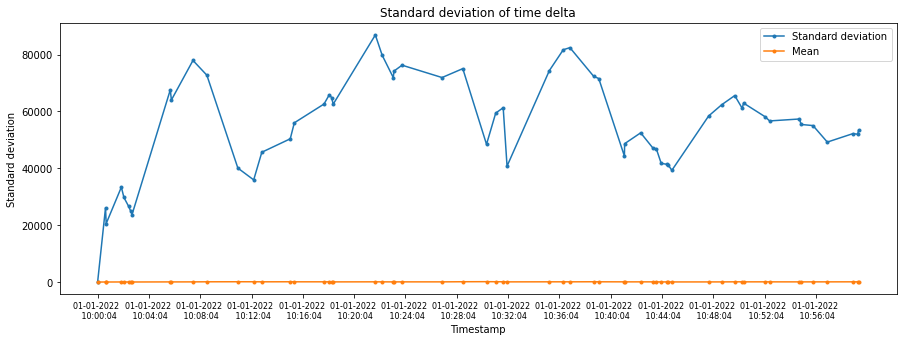

In [6]:
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from indsl.data_quality.rolling_stddev import rolling_stddev_timedelta
from indsl.smooth import sma


data = pd.Series(1, index=pd.date_range(start="2022-01-01 10:00:00", end="2022-01-01 11:00:00", freq="1s")).sample(60)

data = data.sort_index()


time_window = pd.Timedelta(minutes=5)

# Calculate rolling standard deviation of time delta
stddev = rolling_stddev_timedelta(data, time_window=time_window).values

# Calculate rolling mean of time delta
mean = sma(data.index.to_series().diff().astype("timedelta64[s]").fillna(0), time_window=pd.Timedelta("5min"), min_periods=1)

# Plot standard deviation and mean
fig, ax = plt.subplots(figsize=(15, 5))
ax.title.set_text("Standard deviation of time delta")
ax.plot(data.index, stddev, label="Standard deviation", marker=".")
ax.plot(data.index, mean, label="Mean", marker=".")

values = np.arange(data.index[0], data.index[-1], timedelta(minutes=4)).astype(datetime)

ax.set_xticks(values)
ax.set_xticklabels([ts.strftime("%d-%m-%Y \n %H:%M:%S") for ts in values], fontsize=8)

legend = ax.legend(loc="upper right")

plt.xlabel("Timestamp")
plt.ylabel("Standard deviation")

plt.show()